### Brooklyn gym prediction

Is there a connection between rent price in brooklyn and does the apartment has gym? If so whats the threshold?

Logistic Regression should answer those questions.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

df = pd.read_csv('brooklyn.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2869,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
1,4318,3900,3.0,2,1000,4,9.0,8,0,0,0,0,1,0,0,0,Greenwood,Brooklyn
2,6265,2700,2.0,1,900,4,2.0,96,0,0,0,0,0,0,0,0,Gowanus,Brooklyn
3,24,4900,1.0,1,1216,6,3.0,88,0,0,0,0,0,0,0,0,Brooklyn Heights,Brooklyn
4,9481,3900,0.0,1,1100,3,4.0,85,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn


We look only at two columns from brooklyn dataset. 
* **Rent** - rent price in $
* **has_gym** - 0 for no gym, 1 for a gym in the apartment. 

First we will have to scale our data. To bring it onto same scale. Then we will split data into two parts: "Train" and "Test".
* "Train" - will be used to train model
* "Test" - will be used to test data

In [9]:
# Separate out X (rent) and y (has_gym)
X = df[['rent']]
y = df[['has_gym']]

In [13]:
# Scale data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=6)

In [21]:
# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [37]:
# Save and print predicted classes
y_pred = model.predict(X_test)
print("Predicted classes: ", y_pred)

# Print out the true outcomes for the test data
print("True classes: ", y_test.values.ravel())

Predicted classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
True classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0

In [24]:
# Print out the confusion matrix
print("Confusion matrix: ")
print(confusion_matrix(y_test,y_pred))

Confusion matrix: 
[[235   0]
 [ 18   1]]


In [26]:
# Print out accuracy
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9291338582677166


In [29]:
# Print out precision
print("Precision score: ", precision_score(y_test,y_pred))

Precision:  1.0


In [31]:
# Print out recall
print("Recall score: ", recall_score(y_test, y_pred))

Recall score:  0.05263157894736842


In [27]:
# Print out F1 score
print("F1 score", f1_score(y_test, y_pred))

F1 score 0.1


In [33]:
# Print out the predicted probabilities for the test data
print(model.predict_proba(X_test)[:,1])

[0.09308779 0.077156   0.07563252 0.09400324 0.05587666 0.07870755
 0.0615404  0.05228791 0.06061174 0.08006465 0.08258099 0.06310499
 0.09021188 0.05255606 0.06525764 0.07601078 0.06531034 0.1470054
 0.07336968 0.06248234 0.0637592  0.05761009 0.06061174 0.0698112
 0.10768977 0.05587666 0.12904478 0.09218034 0.08511864 0.0618529
 0.06485052 0.06842199 0.06311776 0.05096647 0.10162147 0.05228791
 0.09218034 0.10261136 0.07051554 0.06572015 0.077156   0.05761009
 0.0605503  0.07266815 0.0977462  0.12309825 0.05761009 0.33897499
 0.06760081 0.10768977 0.05149121 0.05587666 0.06311776 0.0618529
 0.09218034 0.08012829 0.06061174 0.05530983 0.05364168 0.05309625
 0.05096647 0.05879363 0.65196357 0.06506035 0.06638616 0.05202106
 0.07413671 0.05149121 0.05419239 0.05419239 0.07004994 0.08108842
 0.0504468  0.06506035 0.05364168 0.1307531  0.06179028 0.06061174
 0.05581973 0.21154481 0.08715823 0.07325233 0.05474842 0.0551746
 0.06311776 0.07510586 0.05502845 0.06835321 0.10360977 0.06705844


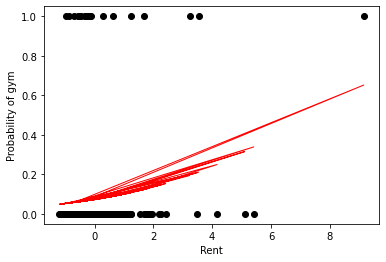

<Figure size 432x288 with 0 Axes>

In [57]:
# Plug sample data into fitted model
probability = model.predict_proba(X_test)[:,1]

# Plot exam data
plt.scatter(X_test,y_test,color='black')

# Plot logistic curve
plt.plot(X_test, probability, color='red', linewidth=1)
plt.xlabel('Rent')
plt.ylabel('Probability of gym')
plt.show()
plt.clf()

#### Conclusion

Even though model accuracy is at 0.92 its recall and F1 score are very low. It provided with 18 False Negative values and only one True Positive (out of 19) on the test data. Given all that we can conclude that rent price can not be used as classifier for the gym availability. 